In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

Import Data

In [6]:
df = pd.read_excel ('/content/ASIANPAINT.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ASIANPAINT.xlsx'

Split Train and Test dataset

In [ ]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]

print(X_test)


           Date    Adj_Close
921  2018-09-25  1261.623779
922  2018-09-26  1253.897095
923  2018-09-27  1259.276489
924  2018-09-28  1264.949463
925  2018-10-01  1251.745361
...         ...          ...
1224 2019-12-24  1780.978882
1225 2019-12-26  1787.052368
1226 2019-12-27  1789.669312
1227 2019-12-30  1779.843384
1228 2019-12-31  1762.709351

[308 rows x 2 columns]


Exponential Moving Average

In [ ]:
df = df['Adj_Close'].to_frame()

for i in range(1,31):
  df['EWMA',i] = df['Adj_Close'].ewm(span=i).mean()
  Y_train = df[:int(df.shape[0]*0.75)]



Root Mean Square Error



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

result_test = []
for i in range(1,31):
  rms_test = mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)])
  rms_test = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)]))
  test = rms_test
  result_test.append(test)

print(result_test)

  
result_train = []
for i in range(1,31):
  rms_train = mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i])
  rms_train = sqrt(mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i]))
  train = rms_train
  result_train.append(train)

print(result_train)


[0.0, 7.876451102019893, 12.896820304376021, 16.75256248352337, 19.9549185830322, 22.732884379461076, 25.209332536191006, 27.457841848546728, 29.526221586451666, 31.447706051497303, 33.246732913274684, 34.94208791548584, 36.54869249544803, 38.07866793129817, 39.54200440011035, 40.94700885488491, 42.30062476963722, 43.60867387949303, 44.87604721312478, 46.10686062818412, 47.30458370341179, 48.47214750817622, 49.612035007809496, 50.726356900540544, 51.81691511835772, 52.885255856963674, 53.93271372998229, 54.96044842343371, 55.969475037750634, 56.96068913786764]
[0.0, 5.029645743968239, 8.148963768035797, 10.549164227378816, 12.56483914451714, 14.336776518804271, 15.937355148705782, 17.408731403174578, 18.77778862487039, 20.06290319030879, 21.277329894483213, 22.431036886522946, 23.531769367063276, 24.58570239237039, 25.597861462305815, 26.572405045079787, 27.512821340960567, 28.42206969108341, 29.30268501866957, 30.156856814373974, 30.986490100905456, 31.793253317704572, 32.578616496353

Ploting RMSE value for 1 to 30

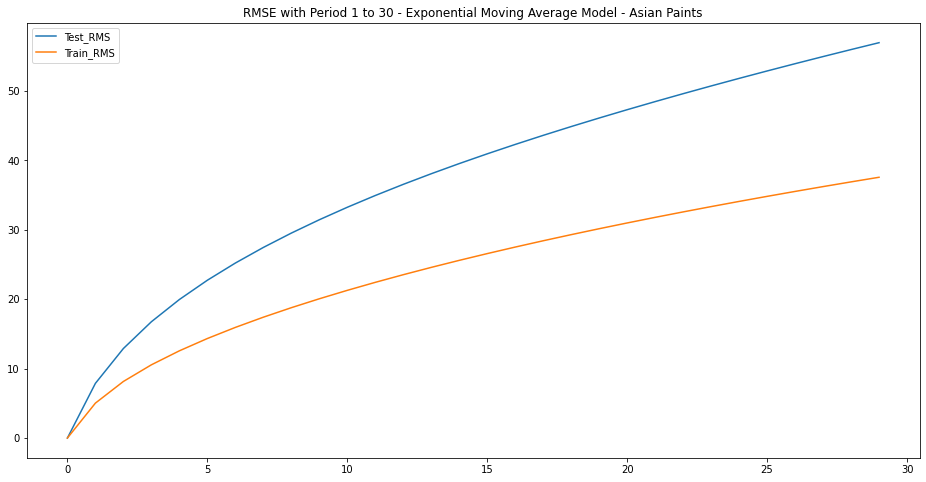

In [ ]:
x=result_test
y = result_train
plt.figure(figsize=[16,8])
plt.title('RMSE with Period 1 to 30 - Exponential Moving Average Model - Asian Paints')
plt.plot(x,label='Test_RMS')
plt.plot(y,label='Train_RMS')
plt.legend(loc=2)



Ploting Exponential Moving Average

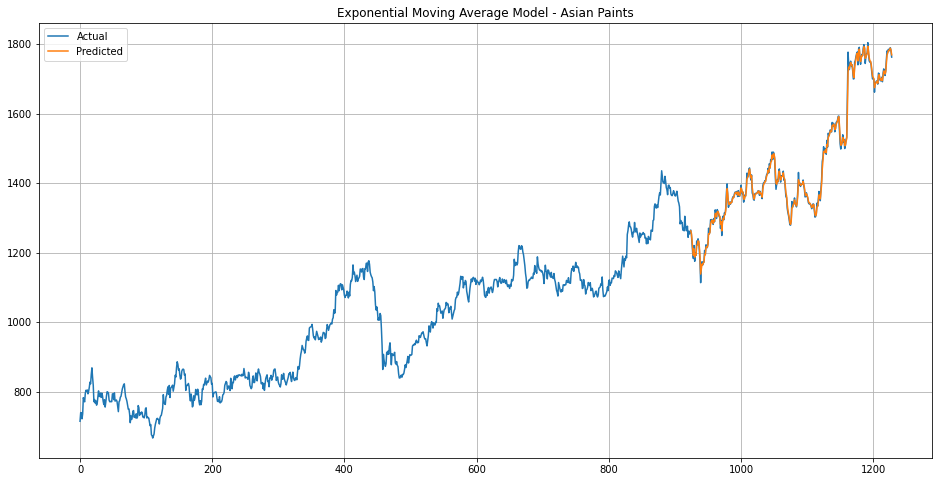

In [ ]:
plt.figure(figsize=[16,8])
plt.title('Exponential Moving Average Model - Asian Paints')
plt.grid(True)
plt.plot(df['Adj_Close'],label='Actual')
plt.plot(df['EWMA',2][924:len(df)],label='Predicted')
plt.legend(loc=2)